<a href="https://colab.research.google.com/github/Jamie-Huang/Spotify-DS-Challenge/blob/main/Shopify_Data_Science_Intern_Challenge_JamieHuang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1

In [2]:
import pandas as pd

**Reading in Data**

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Shopify Data Science Intern Challenge Data Set - Sheet1.csv')

## Question 1. a)

In [34]:
print(f'The median order amount is ${data["order_amount"].median()}')

The median order amount is $284.0


Comparing AOV to a robust statistic to outliers, like the median of order amounts which is \$284, the AOV of \$3145.13 seems to imply that there is an issue with the dataset.


**Create Shoe_Price column, which is the cost per shoe at each Store**

In [4]:
data['shoe_price'] = data['order_amount']/data['total_items']

In [30]:
print(f'The most expensive shoe is ${max(data["shoe_price"])}')

The most expensive shoe is $25725.0


In [29]:
print(f'The cheapest shoe is ${min(data["shoe_price"])}')

The cheapest shoe is $90.0


**Histogram of Order Amounts**

Text(0, 0.5, 'Count of Order Amount')

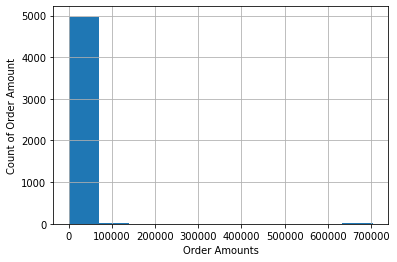

In [5]:
OA_hist = data['order_amount'].hist()
OA_hist.set_xlabel('Order Amounts')
OA_hist.set_ylabel('Count of Order Amount')


**Histogram of Shoe Prices**

Text(0, 0.5, 'Count of Shoe Price')

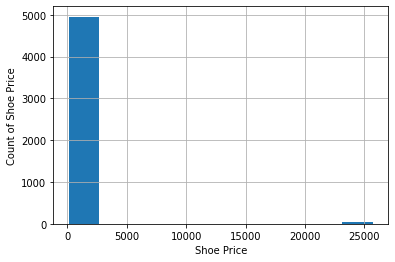

In [6]:
shoe_price_hist = data['shoe_price'].hist()
shoe_price_hist.set_xlabel('Shoe Price')
shoe_price_hist.set_ylabel('Count of Shoe Price')

Looking at each histogram, there appears to be an outlier, which are likely the reasons for the large AOV. 


**Analysis of order_amount**

In [7]:
oa_outlier_df = data[data['user_id'] == 607]

In [8]:
print(f'user_id 607 ordered {oa_outlier_df.shape[0]} times in the 30 day period')
print(f'user_id 607 has only ordered from shop_id {oa_outlier_df["shop_id"].unique()[0]}')
print(f'All orders made by user_id 607 were payed for using {oa_outlier_df["payment_method"].unique()[0]}')

user_id 607 ordered 17 times in the 30 day period
user_id 607 has only ordered from shop_id 42
All orders made by user_id 607 were payed for using credit_card


Investigating the order amounts, user_id 607 had a lot of suspicious activity, and is the outlier in the order amounts histogram. User_id 607 purchased \$704,000 worth of shoes from shop_id 42 17 times over a 30 day period. Ordering exactly \$704,000 worth of shoes 17 times is highly abnormal, and what likely happened is fraud, data entry error, or a database error. Given that all 17 orders were payed for by credit card, it is more likely that user_id stole someone's credit card and fraudulently made these purchases. Regardless, the 17 orders from user_id 17 should definitely be further investigated into. These 17 orders frm user_id 17 are not representative of the dataset.

**Analysis of shoe_price**

In [9]:
sp_outlier_df = data[data['shop_id'] == 78]

In [15]:
print(f'shop_id 78 had an AOV of ${round(sp_outlier_df["order_amount"].mean(),2)} in the 30 day period')
print(f'The shoe price from shop_id 78 is ${sp_outlier_df["shoe_price"].unique()[0]}')
print(f'shop_id 78 had {sp_outlier_df.shape[0]} orders in the 30 day period')
print(f'{len(sp_outlier_df["user_id"].unique())} different customers made a purchase at shop_id 78 during the 30 day period')

shop_id 78 had an AOV of $49213.04 in the 30 day period
The shoe price from shop_id 78 is $25725.0
shop_id 78 had 46 orders in the 30 day period
45 different customers made a purchase at shop_id 78 during the 30 day period


Looking into the histogram for shoe prices at each store, shop_id 78 also had a lot of suspicious activity. Shop_id 78 had 46 orders with an average order amount of \$49213.04 within the 30 day period. This type of transaction history is highly abnormal. Again, possible sources for this history is fraud, data entry error, or a database error. The shoe price of shop_id is \$25,725. Even designer shoes do not get this expensive, and it is very unlikely that such a shoe is ordered 46 different times. Combined with the fact that there were purchases made with cash, debit card and credit cards, and there were purchases made by multiple users, I believe it is most likely that there was a data entry error with the shoe price.


**Conclusions**

A better way to evaluate the data is to have a cleaned dataset that would exclude orders made by user_id 607, and orders submitted to shop_id 78, because including those data points does not accurately represent the dataset. There does not seem to be any outliers with shops that have shoes that are too cheap, as the least expensive shoe in the dataset is \$90. 

## Question 1. b)

A metric for this dataset that could be used for the original dataset is the median of the order_amount, because the median is robust to outliers, and as analyzed in a), the dataset has quite a bit of outliers.

However, I believe the best metric that represents the dataset is to calculate the average of order amounts on the dataset that doesn’t have any outliers. The mean is a better metric than the median because it takes into account all data points, while the median doesn’t. A major disadvantage of the mean is that it is vulnerable to outliers, but because the mean will be calculated on a dataset with the outliers removed, the mean is a suitable metric.


## Question 1. c)

In [35]:
cleaned_data = data[(data['user_id'] != 607)& (data['shop_id'] != 78)]

In [39]:
print(f'The AOV of the cleaned dataset is ${round(cleaned_data["order_amount"].mean(),2)}')
print(f'The median of the raw dataset is ${data["order_amount"].median()}')

The AOV of the cleaned dataset is $302.58
The median of the raw dataset is $284.0


The mean AOV of the cleaned dataset without outliers is \$302.58. The median AOV of the raw dataset is \$284, indicating that the mean of the cleaned dataset is a metric that better represents the shoe sale dataset.


# Question 2

## Question 2. a)

Query:
SELECT Count(orderid) AS OrdersShippedBySpeedyExpress
FROM   orders
WHERE  shipperid = (SELECT shipperid
                    FROM   shippers
                    WHERE  shippername = 'Speedy Express')

Answer:
54 orders were shipped by Speedy Express in total.



Thought Process:
Because orders only has the shipperid, we get the shipperid of Speedy Express from shippers. Then, we can do a count of orderid from orders from orders shipped by Speedy Express.


## Question 2. b)

Query:
SELECT EmployeeOrders, lastname
FROM   (SELECT employeeid,
               Count(employeeid) AS EmployeeOrders
        FROM   orders
        GROUP  BY employeeid) AS T1
       INNER JOIN employees AS E
               ON T1.employeeid = E.employeeid
ORDER  BY employeeorders DESC 

Answer:
The employee with the most orders had the last name of Peacock, who completed 40 orders.



Thought Process: The subquery gets the number of orders completed by each employee, and joining with the employee table gets the last name of each employee, and then the descending ordering gets the employee with the most orders.

## Question 2. c)

Query:
SELECT P.productname,
       Sum(OD.quantity) AS TotalPurchases
FROM   (((orders AS O
          INNER JOIN customers AS C
                  ON O.customerid = C.customerid)
         INNER JOIN orderdetails AS OD
                 ON O.orderid = OD.orderid)
        INNER JOIN products AS P
                ON OD.productid = P.productid)
WHERE  C.country = 'Germany'
GROUP  BY P.productname
ORDER  BY Sum(OD.quantity) DESC


Answer:
Boston Crab Meat was the product ordered the most by customers in Germany.


Thought Process:
Orders, country, products and customers all need to be joined. Orders and countrys are need to filter on German customers, order details and orders are needed to get the quantity of items ordered, and order details and products are needed to get the product names. After those tables are joined, a groupby on the product names is needed to get get how many times each product is ordered. Then we order by the times each product is ordered in descending order to get to see which product is ordered the most.